<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Physics-Lab" data-toc-modified-id="Physics-Lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Physics Lab</a></span><ul class="toc-item"><li><span><a href="#Parte-2:--Análise-de-dados-de-um-movimento-acelerado-em-2D" data-toc-modified-id="Parte-2:--Análise-de-dados-de-um-movimento-acelerado-em-2D-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Parte 2:  Análise de dados de um movimento acelerado em 2D</a></span></li><li><span><a href="#Breve-recaptulação-da-teoria" data-toc-modified-id="Breve-recaptulação-da-teoria-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Breve recaptulação da teoria</a></span></li><li><span><a href="#Configuração" data-toc-modified-id="Configuração-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Configuração</a></span></li><li><span><a href="#Importar-dados" data-toc-modified-id="Importar-dados-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Importar dados</a></span></li><li><span><a href="#Encontrando-as-componentes-da-aceleração" data-toc-modified-id="Encontrando-as-componentes-da-aceleração-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Encontrando as componentes da aceleração</a></span><ul class="toc-item"><li><span><a href="#Ajuste-da-função-para-trajetória-R" data-toc-modified-id="Ajuste-da-função-para-trajetória-R-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Ajuste da função para trajetória R</a></span><ul class="toc-item"><li><span><a href="#Coordenada-x" data-toc-modified-id="Coordenada-x-1.5.1.1"><span class="toc-item-num">1.5.1.1&nbsp;&nbsp;</span>Coordenada x</a></span></li><li><span><a href="#Coordenada-y" data-toc-modified-id="Coordenada-y-1.5.1.2"><span class="toc-item-num">1.5.1.2&nbsp;&nbsp;</span>Coordenada y</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Dados-experimento-aula-1-(Prof.-Dra.-Angela)." data-toc-modified-id="Dados-experimento-aula-1-(Prof.-Dra.-Angela).-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dados experimento aula 1 (Prof. Dra. Angela).</a></span><ul class="toc-item"><li><span><a href="#Experimento:-Dado" data-toc-modified-id="Experimento:-Dado-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Experimento: Dado</a></span><ul class="toc-item"><li><span><a href="#Coordenada-z1" data-toc-modified-id="Coordenada-z1-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Coordenada z1</a></span></li><li><span><a href="#Coordenada-x1" data-toc-modified-id="Coordenada-x1-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Coordenada x1</a></span></li></ul></li></ul></li></ul></div>

# Physics Lab

## Parte 2:  Análise de dados de um movimento acelerado em 2D

Nome:  ____

Ra: ___

## Breve recaptulação da teoria


O movimento bidimensional, usualmente é caracterizado por trajetórias descritas no eixo y e eixo x. 






## Configuração

Você precisará importar os seguintes pacotes.

In [51]:
# pacotes para manipulação dos dados

from numpy import *
import pandas as pd
%matplotlib inline

# pacote para confecção de gráficos para visualizar os resultados
# de uma maneira mais apreciável e criar nossos modelos
import matplotlib.pyplot as plt

# ajustando algumas configurações para melhor visualização dos gráficos
plt.rcParams['font.size'] = 16                           # altera o tamanho das fontes na figura
plt.rcParams['figure.figsize'] = 10, 8                    # altera o tamanho da figura
plt.rcParams['axes.axisbelow'] = True                    # para desenhar os grids atrás das curvas e pontos
for axis in ['xtick', 'ytick']:                          # loop para aplicar as mudanças nos eixos x e y
    plt.rcParams['{}.major.size'.format(axis)] = 10      # altera o tamanho dos ticks maiores
    plt.rcParams['{}.minor.size'.format(axis)] = 5       # altera o tamanho dos ticks menores
    plt.rcParams['{}.minor.visible'.format(axis)] = True # faz os ticks menores ficarem visíveis

Como antes, `numpy` é para python numérico,` pandas` é para importação de dados e `matplotlib` é para criação de gráficos.

Python é uma linguagem de programação orientada a objetos. Essa é uma maneira poderosa de programar, mas, para nossos propósitos, oferece uma maneira conveniente de armazenar dados. Cada "caminho" terá tempo $ t $, posição $ x $ e posição $ y $. A linha a seguir criará uma classe chamada `Path ', que será o modelo para nossos objetos Path.

In [52]:
class Path: pass

Se você estiver curioso, pode aprender mais sobre [object oriented programming](https://searchmicroservices.techtarget.com/definition/object-oriented-programming-OOP) e [Python classes](https://docs.python.org/3/tutorial/classes.html).

##  Importar dados

Vamos importar um dado de uma trajetória bidimensional

Use o código a seguir para extrair as posições das coordenadas $ x $ e $ y $ do objeto no momento $ t $.

In [53]:
dataR = pd.read_csv('lab_04-sample_data_R.csv')
dataR.keys()    # this will give us the data column names

Index(['Tempo (s)', 'X (m)', 'Y (m)', 'X Velocidade (m/s)',
       'Y Velocidade (m/s)'],
      dtype='object')

In [54]:
dataR[1:5]

,Tempo (s),X (m),Y (m),X Velocidade (m/s),Y Velocidade (m/s)
1,1.466667,0.367586,0.166839,-0.098979,-0.060788
2,1.500000,0.363713,0.165254,-0.080400,-0.062654
3,1.533333,0.362293,0.162637,-0.062860,-0.064262
4,1.566667,0.360597,0.160735,-0.073035,-0.060576


Precisamos dos dados $ x, y $ e $ t $ para cada caminho.

In [55]:
#C = Path()
#C.t = dataC['VideoAnalysis: Time (s)'].values      # times in seconds
#C.x = dataC['VideoAnalysis: X (m)'].values * 1000  # x-positions, convert m to mm
#C.y = dataC['VideoAnalysis: Y (m)'].values * 1000  # y-positions, convert m to mm

In [56]:
R = Path()
R.t = dataR['Tempo (s)'].values      # times in seconds
R.x = dataR['X (m)'].values * 1000  # x-positions, convert m to mm
R.y = dataR['Y (m)'].values * 1000  # y-positions, convert m to mm

Você precisará importar os dados do caminho R. você mesmo. O código pode ser copiado de cima e colado na célula vazia abaixo e, em seguida, serão necessárias algumas edições menores para definir um objeto `R` e seus dados` R.t`, `R.x` e` R.y`.

Vamos dar uma olhada nos caminhos.

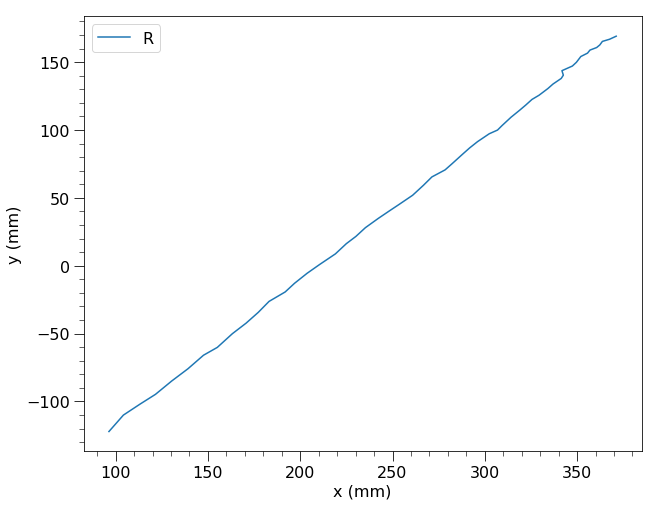

In [46]:
#plt.plot(C.x, C.y, label='C')
plt.plot(R.x, R.y, label='R')
#plt.axes().set_aspect('equal')  # Fazer um gráfico com escalas iguais no eixo x e y caso queira

plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.legend()

## Encontrando as componentes da aceleração

Precisamos encontrar quatro acelerações diferentes: $ a_x $ e $ a_y $ para o caminho C e para o caminho R. Cada um pode ser encontrado ajustando uma parábola aos dados. O primeiro destes é feito abaixo; você precisa fazer o mesmo para os outros três.

Você pode querer revisar [last week's lab](lab_03.html) para explicações do procedimento. Buscamos coeficientes do polinômio de segundo grau que melhor se ajustem aos nossos dados $ x (t) $: $ p (t) = A t^2 + B t + C \approx x (t) $.

Fit a parabola to the `x` versus `t` data for path `C`:

### Ajuste da função para trajetória R

#### Coordenada x

In [47]:
(DD,EE,FF),cov = polyfit(R.t,R.x,2,cov=True)
dD,dE,dF = sqrt(diag(cov))    #  get absolute uncertainty
R.Dx = 0.5*DD                # acceleration is 1/2 the coefficient D
R.dDx = 0.5*dD                # uncertainty scales linearly with value

In [48]:
fitR = Path()
fitR.t = linspace( R.t[0], R.t[-1], 100)    # an array of 100 time values
fitR.x = DD*fitR.t**2 + EE*fitR.t + FF      # evaluate the polynomial at these times

In [59]:
value_in_stringx="x(t) = {}t² + {}t - {}".format((DD.round(2)),(EE.round(2)),(FF.round(2)))

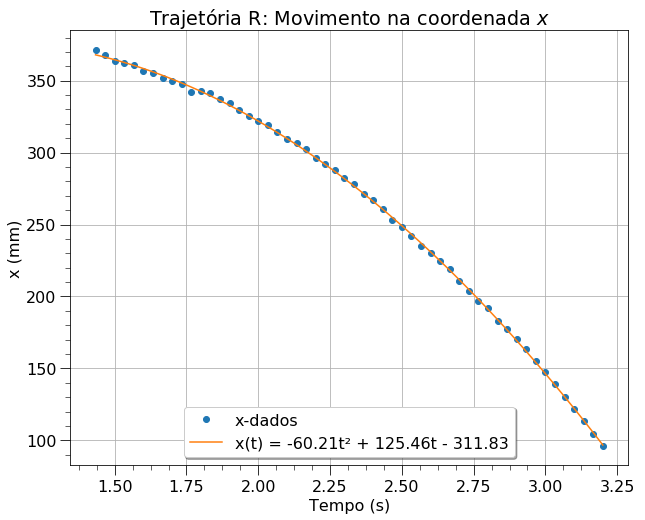

In [62]:
plt.grid()
plt.plot(R.t,R.x,'o',label='x-dados')      # plot the data with dots ('o')
plt.plot(fitR.t,fitR.x,label=value_in_stringx)                   # plot the parabola with a line
plt.xlabel('Tempo (s)')
plt.ylabel('x (mm)')
plt.title('Trajetória R: Movimento na coordenada $x$')
plt.legend(loc='lower center',shadow=True) 

#### Coordenada y

In [29]:
(KK,JJ,VV),cov = polyfit(R.t,R.y,2,cov=True)
dK,dJ,dV = sqrt(diag(cov))    #  get absolute uncertainty
R.Ky = 0.5*KK                 # acceleration is 1/2 the coefficient K
R.dKy = 0.5*dK                # uncertainty scales linearly with value

In [30]:
fitR2 = Path()
fitR2.t = linspace( R.t[0], R.t[-1], 100)    # an array of 100 time values
fitR2.y = KK*fitR2.t**2 + JJ*fitR2.t + VV      # evaluate the polynomial at these times

In [66]:
value_in_stringy="y(t) = {}t² + {}t - {}".format((KK.round(2)),(JJ.round(2)),(VV.round(2)))
value_in_stringy

'y(t) = -62.05t² + 124.15t - 118.45'

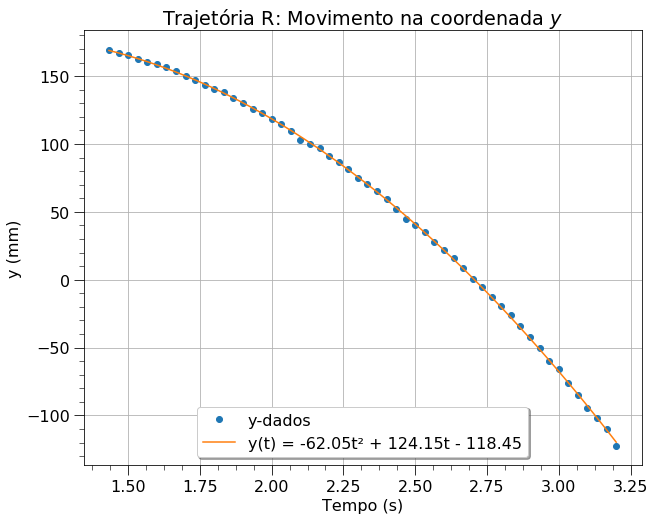

In [67]:
plt.grid()
plt.plot(R.t,R.y,'o',label='y-dados')      # plot the data with dots ('o')
plt.plot(fitR2.t,fitR2.y,label=value_in_stringy)                   # plot the parabola with a line
plt.xlabel('Tempo (s)')
plt.ylabel('y (mm)')
plt.title('Trajetória R: Movimento na coordenada $y$')
plt.legend(loc='lower center',shadow=True)

Depois de obter todos os quatro componentes. Relate seus resultados numéricos.

Agora traçaremos todos os dados.

Podemos ver todos os quatro gráficos de uma só vez usando "subtramas". O código a seguir faz quatro subparcelas em uma figura.

> Você pode aprender mais sobre `subplot` e outros recursos no `matplotlib` [tutorial](https://matplotlib.org/tutorials/index.html).

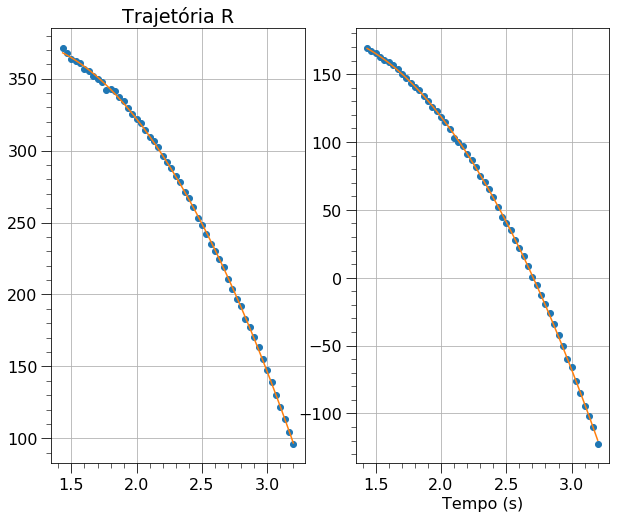

In [70]:
plt.subplot(121)      # 222 means "on a 2x2 grid, plot number 2"
plt.plot(R.t,R.x,'o',label='x movimento')
plt.plot(fitR.t,fitR.x)                   
plt.title('Trajetória R')
plt.grid()
plt.subplot(122)
plt.plot(R.t,R.y,'o',label='y movimento') 
plt.plot(fitR.t,fitR2.y)       
plt.xlabel('Tempo (s)')
plt.grid()

Encontre a magnitude e a direção dos vetores de aceleração $\vec{a}_R$. 

Você deve verificar se os valores de aceleração estão de acordo um com o outro (dentro da razão) e se o ângulo é o que você esperaria dos caminhos plotados (linha 6, acima).

# Dados experimento aula 1 (Prof. Dra. Angela).

In [72]:
#Angela's Data

import numpy as np
from scipy.optimize import curve_fit

# Plotagem dos resultados
import pylab

# Leitura dos dados a partir de arquivo excel
import xlrd

wbang = xlrd.open_workbook('Dados_do_MRUV_Projetil.xlsx')
sh1ang = wbang.sheet_by_name(u'Planilha1')

#Dado1

t1dados = np.array(np.array(sh1ang.col_values(0)),dtype=float)  # leitura da primeira coluna (tempo)
x1dados = np.array(np.array(sh1ang.col_values(1)),dtype=float)  # leitura da segunda coluna (posição x)
z1dados = np.array(np.array(sh1ang.col_values(2)),dtype=float)  # leitura da terceira coluna (posição y)

## Experimento: Dado

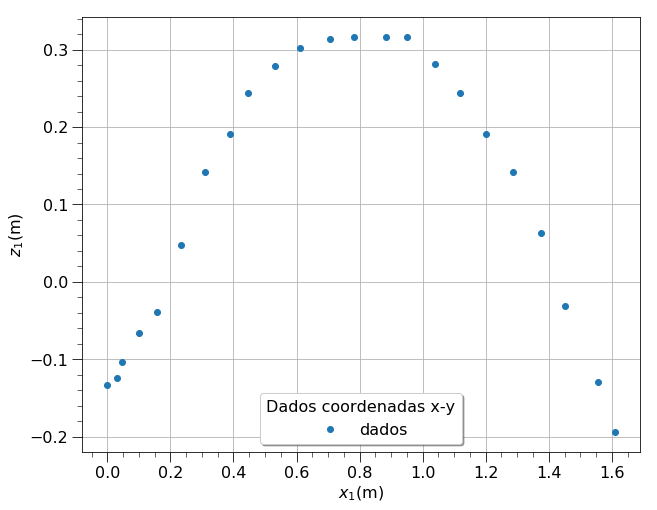

In [138]:
plt.grid()
pylab.plot(x1dados, z1dados, 'o', label='dados')
pylab.xlabel('$x_1$(m)')
pylab.ylabel('$z_1$(m)')
pylab.legend(loc="lower center", ncol=2, shadow=True, title="Dados coordenadas x-y")

### Coordenada z1

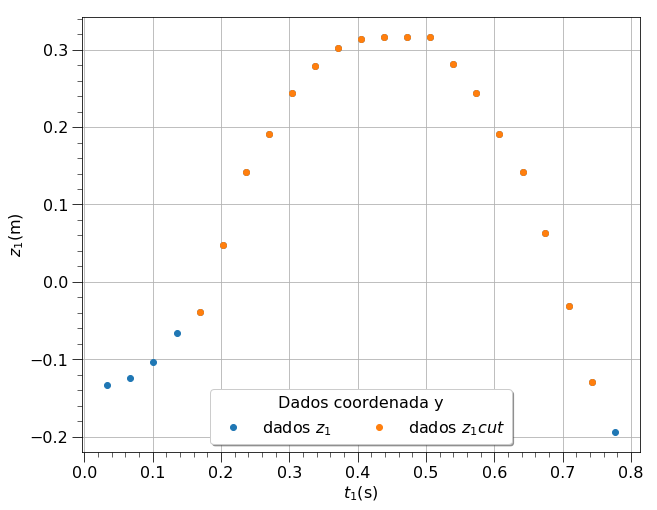

In [189]:
plt.grid()
w=4
z=22
pylab.plot(t1dados, z1dados, 'o', label='dados $z_1$')
pylab.plot(t1dados[w:z], z1dados[w:z], 'o', label='dados $z_1cut$')
pylab.xlabel('$t_1$(s)')
pylab.ylabel('$z_1$(m)')
pylab.legend(loc="lower center", ncol=2, shadow=True, title="Dados coordenada y")

In [190]:
A,B,C = polyfit(t1dados[w:z], z1dados[w:z],2)       # ajuste polinomial de grau 2 no dado t,y
print('Melhor ajuste com os coeficientes')
print('     A=',A,'B=',B,'C=',C)

Melhor ajuste com os coeficientes
     A= -4.9236341535274555 B= 4.329783773736868 C= -0.6224810982546771


In [191]:
aceleração_gravidade = (2*abs(A)).round(3) #valor da gravidade com precisão de 3 casas
"aceleração gravitacional é {} m/s²".format(aceleração_gravidade)

'aceleração gravitacional é 9.847 m/s²'

In [192]:
value_in_string = "Ajuste da parabola $y(t)= {}t² + {}t - {}$".format(A.round(2), B.round(2), abs(C).round(2))
value_in_string # definindo label com a função format

'Ajuste da parabola $y(t)= -4.92t² + 4.33t - 0.62$'

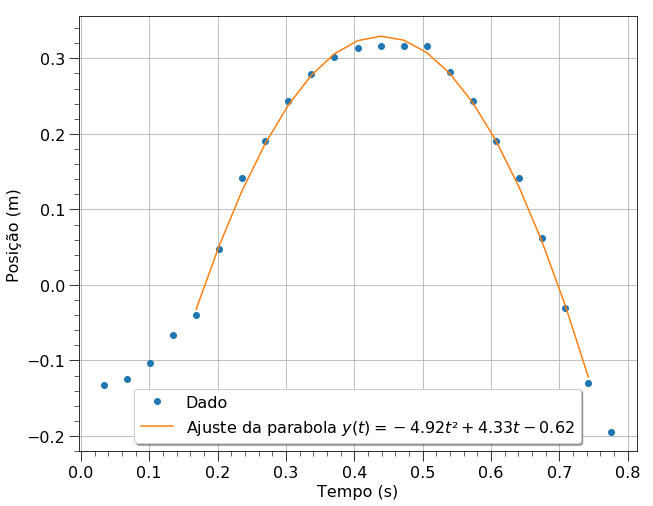

In [193]:
t_axisxy = t1dados[w:z]     #  t_axis é um vetor de mesmo comprimento do dado
plt.grid()
pp = A*t_axisxy**2 + B*t_axisxy + C       # avaliar o polinômio para todos os valores de t_axis
plt.plot(t1dados,z1dados,'o',label='Dado')    # gráfico dos dados
plt.plot(t_axisxy,pp,label=value_in_string)  # gráfico da parábola para todos os valores de t_axis
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.legend(loc='lower center',shadow=True)        # Mostra o gráfico com a legenda value_in_string
plt.savefig('graf_medida_g')

In [194]:
import numpy as np

# Obtendo o valor de R2
yresidxy = z1dados[w:z] - pp # resíduo = valor real - valor ajustado (valor predito)
SQresid = sum(pow(yresidxy,2)) # soma dos quadrados dos resíduos 
SQtotal = len(z1dados[w:z]) * np.var(z1dados[w:z]) # número de elementos do vetor y vezes a variância de y
R2 = 1 - SQresid/SQtotal # coeficiente de determinação
R2

0.9968882262380666

In [195]:
R2_texto="R² = {}".format(R2.round(5)) # definindo label com a função format 
R2_texto

'R² = 0.99689'

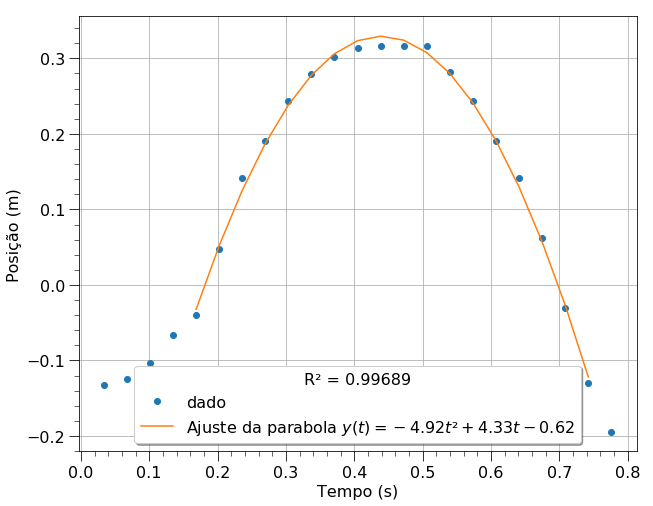

In [196]:
plt.grid()
plt.plot(t1dados,z1dados,'o',label='dado')    # # gráfico dos dados
plt.plot(t_axisxy,pp,label=value_in_string)  # gráfico da parábola para todos os valores de t_axis
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.legend(loc="lower center", ncol=1, shadow=True, title=R2_texto)

### Coordenada x1

In [71]:
len(x1dados)

23

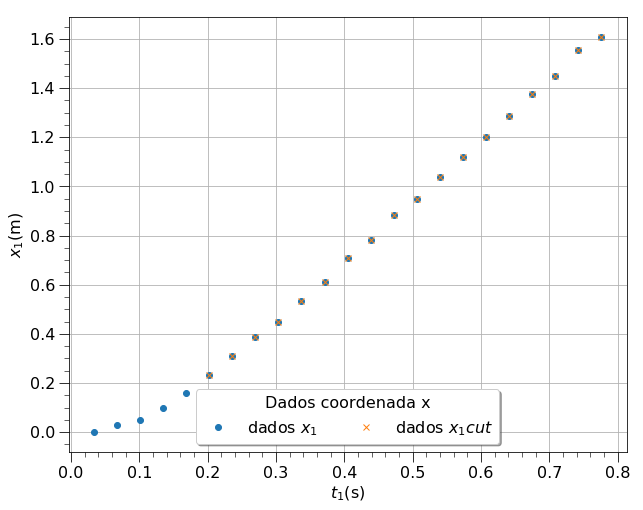

In [146]:
plt.grid()
i=5
f=23
pylab.plot(t1dados, x1dados, 'o', label='dados $x_1$')
pylab.plot(t1dados[i:f], x1dados[i:f], 'x', label='dados $x_1cut$')
pylab.xlabel('$t_1$(s)')
pylab.ylabel('$x_1$(m)')
pylab.legend(loc="lower center", ncol=2, shadow=True, title="Dados coordenada x")

_A parte inicial do gráfico se deve ao impulso gerado pelo lançamento do objeto_

In [147]:
G,H = polyfit(t1dados[i:f], x1dados[i:f],1)       # ajuste polinomial de grau 1 no dado t,y
print('best fit parabola has coefficients')
print('     G=',G,'H=',H)

best fit parabola has coefficients
     G= 2.4428633738110186 H= -0.2792824213750528


In [148]:
vel_text = "x(t) = {}t - {}".format(G.round(2),abs(H).round(2))
vel_text

'x(t) = 2.44t - 0.28'

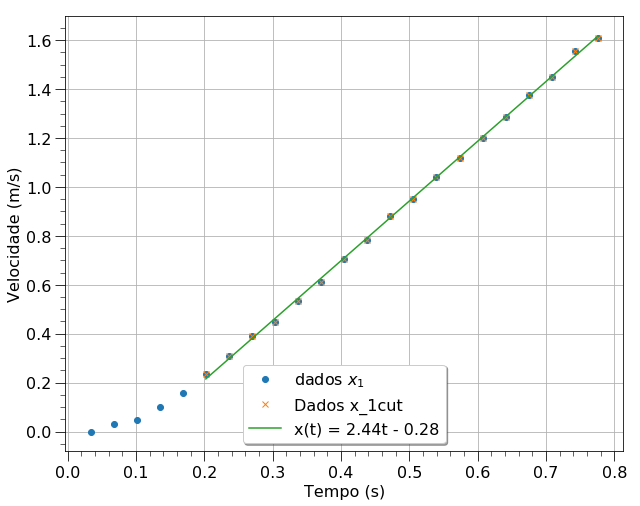

In [197]:
#t_vaxisx = linspace(t1dados[0],t1dados[-1],(f-i))     # t_axis é um vetor de mesmo comprimento do dado
plt.grid()
vt = G*t1dados[i:f] + H       # avalia a função linear em cada valor de t_vaxis
pylab.plot(t1dados, x1dados, 'o', label='dados $x_1$')
plt.plot(t1dados[i:f],x1dados[i:f],'x', label='Dados x_1cut')
plt.plot(t1dados[i:f],vt,label=vel_text)  # gráfico da função horária da velocidade
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.legend(loc='lower center',shadow=True)        # posição da legenda

In [150]:
yresid = x1dados[i:f] - vt # resíduo = valor real - valor ajustado (valor predito)
SQresid = sum(pow(yresid,2)) # soma dos quadrados dos resíduos 
SQtotal = len(x1dados[i:f]) * np.var(x1dados[i:f]) # número de elementos do vetor y vezes a variância de y
R2 = 1 - SQresid/SQtotal # coeficiente de determinação
R2

0.9993691334462264

In [151]:
R2_texto="R² = {}".format(R2.round(5)) # definindo label com a função format 
R2_texto

'R² = 0.99937'

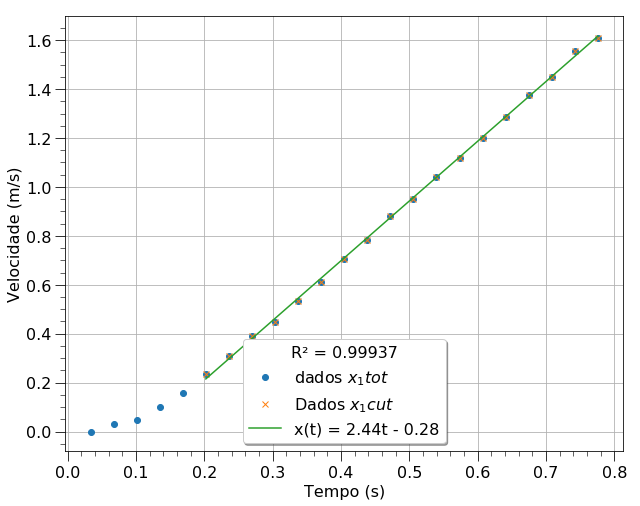

In [152]:
#t_vaxisx = linspace(t1dados[0],t1dados[-1],(f-i))     # t_axis é um vetor de mesmo comprimento do dado
plt.grid()
vt = G*t1dados[i:f] + H       # avalia a função linear em cada valor de t_vaxis
pylab.plot(t1dados, x1dados, 'o', label='dados $x_1tot$')
plt.plot(t1dados[i:f],x1dados[i:f],'x', label='Dados $x_1cut$')
plt.plot(t1dados[i:f],vt,label=vel_text)  # gráfico da função horária da velocidade
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.legend(loc='lower center',shadow=True, title=R2_texto)        # posição da legenda